# 1. Python 3

## Python Tutorial  
We will use Python as programming language in COMP8220. You can find a basic introduction to Python [here](https://www.tutorialspoint.com/python/index.htm). We do not teach Python in this unit and expect that you already know this programming language.   

# 2. Jupyter Notebook

[Here](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook) is a good overview of Jupyter notebooks, how to install, run, and use them for data science.

# 3. Scikit-learn tools: NumPy, Matplotlib, Pandas, and SciPy

[Scikit-learn](https://scikit-learn.org/stable/)  is an open source project, meaning that it is free to use and distribute, and anyone can easily obtain the source code to see what is going on behind the scenes. The scikit-learn project is constantly being developed and improved, and it has a very active user community. It contains a number of state-of-the-art machine learning algorithms, as well as comprehensive documentation about each algorithm. Scikit-learn is a very popular tool, and the most prominent Python library for machine learning. It is widely used in industry and academia, and a wealth of tutorials and code snippets are available online. Scikit-learn works well with a number of other scientific Python tools.

## 3.1 NumPy

NumPy is one of the fundamental packages for scientific computing in Python. It
contains functionality for multidimensional arrays, high-level mathematical functions
such as linear algebra operations and the Fourier transform, and pseudorandom
number generators.

In Scikit-learn, the NumPy array is the fundamental data structure. Scikit-learn
takes in data in the form of NumPy arrays. Any data you’re using will have to be converted
to a NumPy array. The core functionality of NumPy is the ndarray class, a
multidimensional (n-dimensional) array. All elements of the array must be of the
same type. A NumPy array looks like this:

In [51]:
import numpy as np

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


## 3.2 Matplotlib

Matplotlib is the primary scientific plotting library in Python. It provides functions
for making publication-quality visualizations such as line charts, histograms, scatter
plots, and so on. Visualizing your data and different aspects of your analysis can give
you important insights, and we will be using Matplotlib for all our visualizations.
When working inside the Jupyter Notebook, you can show figures directly in the
browser by using the Matplotlib notebook and Matplotlib inline commands.
We recommend using Matplotlib notebook, which provides an interactive environment.

In [52]:
import matplotlib.pyplot as plt

* **Task 1**: Generate a sequence x of numbers from -10 to 10 with 100 steps in between.
* **Task 2**: Create a second array y using sine.
* **Task 3**: Use the plot function to plot x against y using a line style and x as a marker.

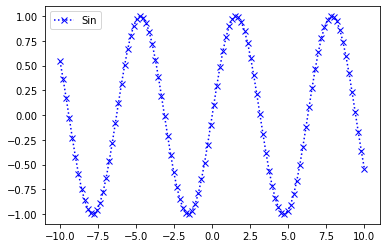

In [3]:
# Your code goes here
x = np.linspace(start=-10, stop=10, num=100)
y = np.sin(x)

plt.plot(x, y, color="blue", label="Sin", marker="x", linestyle="dotted")
plt.legend()
plt.show()

## 3.3 Pandas

Pandas is a Python library for data wrangling and analysis. It is built around a data
structure called the DataFrame that is modeled after the R DataFrame. Simply put, a
Pandas DataFrame is a table, similar to an Excel spreadsheet. Pandas provides a great
range of methods to modify and operate on this table; in particular, it allows SQL-like
queries and joins of tables. In contrast to NumPy, which requires that all entries in an
array be of the same type, Pandas allows each column to have a separate type (for
example, integers, dates, floating-point numbers, and strings). 

* **Task 4**:  Create a Python dictionary that contains the name of four persons, their age (some of them > 30), and their residence and then generate a Pandas DataFrame.
* **Task 5**:  Display all rows where the age is greater than 30.

In [53]:
import pandas as pd
from IPython.display import display
import IPython

# Your code goes here.
data_dict  = {"Name":["Linda", "Peter", "Samantha", "Justin"],
              "Age":[34, 56, 24, 29],
              "Location":["Sydney", "Melbourne", "Perth", "Hobart"]}
data = pd.DataFrame(data_dict)

display(data)

print()

display(data[data["Age"] > 30])

,Name,Age,Location
0,Linda,34,Sydney
1,Peter,56,Melbourne
2,Samantha,24,Perth
3,Justin,29,Hobart


,Name,Age,Location
0,Linda,34,Sydney
1,Peter,56,Melbourne


## 3.4 SciPy

SciPy is a collection of functions for scientific computing in Python. It provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distri‐ butions. scikit-learn draws from SciPy’s collection of functions for implementing its algorithms. The most important part of SciPy for us is scipy.sparse: this provides sparse matrices, which are another representation that is used for data in scikit- learn. Sparse matrices are used whenever we want to store a 2D array that contains mostly zeros:

* **Task 6**: Create a 2D NumPy array where the diagonal from top left to bottom right consists of only 1s, and all other cells of 0s.

In [5]:
from scipy import sparse

# Your code goes here.
sci_eye = sparse.diags(diagonals=[1,1,1,1]).toarray()
eye = np.eye(4) 
print("NumPy array:", eye, sci_eye, sep="\n\n")

NumPy array:

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## 3.5 Life Satisfaction

* **Task 6**: Reconstruct the Life Satisfaction example that we discussed in the lecture. You can find the dataset folder with the two relevant Excel files in iLearn.

In [55]:
# from google.colab import drive
# drive.mount('/content/gdrive')

from google.colab import files
uploaded = files.upload()

Saving gdp_per_capita.csv to gdp_per_capita (2).csv
Saving oecd_bli_2015.csv to oecd_bli_2015 (2).csv


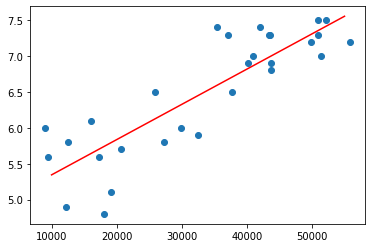

In [57]:
# Your code goes here.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, neighbors
import os 

# This is only a helper function that just merges the OECD's life satisfaction 
# data and the IMF's GDP per capita data. 
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 
                              'Life satisfaction']].iloc[keep_indices]
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",
                             thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

model = linear_model.LinearRegression()
model.fit(X, y)
line_x = np.linspace(start=10000, stop=55000, num=10)
line_y = model.coef_[0,0] * line_x + model.intercept_[0]

# Plot the regression line
plt.plot(line_x, line_y, color="red")

# Visualize the data
plt.scatter(country_stats["GDP per capita"], country_stats["Life satisfaction"])
#country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.show()

In [58]:
print("Here's why we did the indexing:", model.coef_, model.coef_[0,0], model.intercept_, model.intercept_[0], sep="\n")

Here's why we did the indexing:
[[4.91154459e-05]]
4.911544589158484e-05
[4.8530528]
4.853052800266436


## 4. A Simple Machine Learning Problem

**Task 7:** The Scikit-learn library comes with a set of built-in datasets, among them the diabetes dataset. The diabetes dataset contains data from patients with features such as their age, sex, body mass index, blood pressure, etc. These features can be used for predicting the diabetes disease progression in patients. Run the code in the cells below and try to understand what the code in each cell is doing. We will discuss some of the concepts used here in the coming weeks. 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

In [62]:
df1 = pd.DataFrame(X, columns = ["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
df1

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [63]:
df2 = pd.DataFrame(y, columns = ["disease_progression"])
df2

,disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [64]:
df = pd.merge(df1, df2, left_index = True, right_index = True)
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


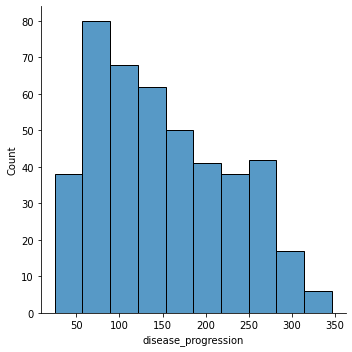

In [65]:
sns.displot(df['disease_progression'])
pass

In [66]:
X = df.drop(['disease_progression'], axis = 1)
y = df.disease_progression

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [67]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(X_train, y_train)

print(lr_model.score(X_train, y_train))

0.5279198995709651


In [68]:
pred = lr_model.predict(X_test)
pred

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [69]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, pred, squared = True)
rms

2900.1732878832318

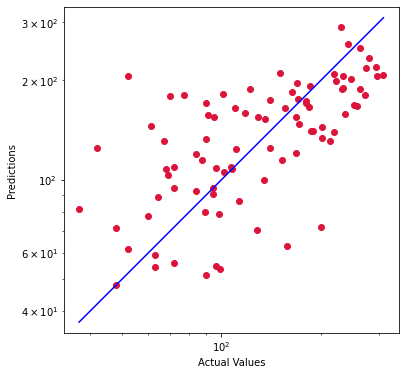

In [70]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predictions', fontsize = 10)
plt.axis('equal')
plt.show()